## **Project Requirements**

**1.High-Level View [2 pts]**


This dataset includes a wide range of factors for countries worldwide, including their region, happiness rank, happiness score, low confidence interval, upper confidence interval, economy (GDP per capita), family, health (life expectancy), freedom, trust(corruption), generosity and dystopia residual. This dataset can be used for various tasks such as studying global well-being trends, understanding the impact of economic and social variables on what we understand of "happiness". It also helps us identify specific patterns in key factors that can influence lifestyles.

**2. Preliminary Exploration [4 pts]**



• Just by looking at the data, I can tell there is some missing information for certain countries in specific factors. By missing data I am referring to the 0 values in some columns, but that zero could mean so many different things. I will not remove it, I will take it as a value. To report the data is noisy I will need to plot the data, and see the distribution and spreadness of it. Another way to see if there is any noise in our data is to create boxplots for numerical columns and report the outliers.
• To clean this dataframe I will either choose to drop rows with missing values or impute them with methods like mean, median, etc.

•In the next steps I will expose how I worked the preliminary exploration

**3. Defining objectives - [3 pts]**

*Factors influencing happiness scores*


•From GDP, freedom, and trust in government exhibit the strongest correlation with the happiness score


*Continental variations in happiness*


• Are there significant variations in happiness scores among different continents or regions?


*Comparing the family  and happiness score*


•*Comparing the family  and happiness score*


•Is there any relationship between region, happiness score, and the influence on family?

• Extra, does the saddest country based on happiness score compared to the happy country (based on happiness score) have a bigger value on family?

#  First Step

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
%matplotlib inline

In [3]:
df=pd.read_csv('https://drive.google.com/uc?id=1PcCyXXs28wvhAcatjBqa48hf9JD8_Xqa&export=download')


In [4]:
df.shape

(157, 13)

In [5]:
#to look for the first couple of rows
df.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [6]:
#to look for the last rows
df.tail()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
152,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812
153,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
154,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789
156,Burundi,Sub-Saharan Africa,157,2.905,2.732,3.078,0.06831,0.23442,0.15747,0.04320,0.09419,0.20290,2.10404


In [7]:
#conditions you are dealing with
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

#Preliminary Exploration

I decided to start by using the function describe(), which will provide me a quick summary of the statistical properties of my data set.  It will help me  understand better the information I am working with

In [8]:

df.describe()

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,78.980892,5.382185,5.282395,5.481975,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
std,45.466030,1.141674,1.148043,1.136493,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220
min,1.000000,2.905000,2.732000,3.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,40.000000,4.404000,4.327000,4.465000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710
50%,79.000000,5.314000,5.237000,5.419000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740
75%,118.000000,6.269000,6.154000,6.434000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650
max,157.000000,7.526000,7.460000,7.669000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720


df.info() will help me asses the structure and characteristics of my dataframe. If there's a potential issue I will be able to notice it by using this function.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

It seems there are no issues with this data set. It seems there is no missing data. I will still need to check for outliers and data visualization to get a better understanding of it.


I am pretty sure there are no missing values, but still, to be 100% I will be running the next code: .isna().sum(). This will provide me a series that will show me if there is a missing value in each column of my DataFrame

In [10]:
print(df.isna().sum())

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64


I can conclude there are no missing values.





<Figure size 3000x2000 with 0 Axes>

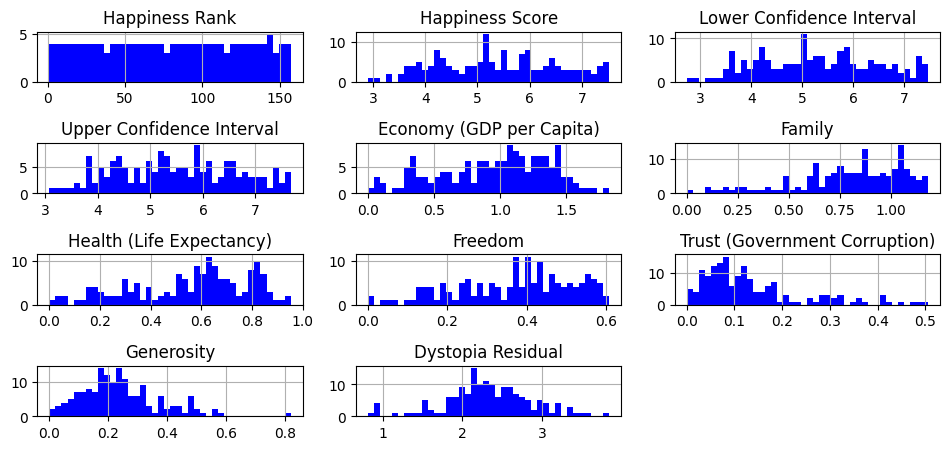

In [11]:
plt.figure(figsize=(30,20))
df.hist(bins=40, color='blue',grid=True)

plt.tight_layout(rect=[0, 0, 1.5, 0.96])

I decided to create a histogram plot for all values. This will provide me a quick visual overview of the distribution of values in each column.

Based on this preliminary exploration I can conclude the data set is pretty clean. Therefore I will continue with the next steps, which are working on my objectives.


# 3. Defining objectives


*Factors influencing happiness scores*


•From GDP, freedom, and trust in government exhibit the strongest correlation with the happiness score


I am looking for :

 Factors influencing happiness scores : GDP, freedom, and trust in government exhibit the strongest correlation with happiness score

In [12]:

df_filtered=df[['Happiness Score','Economy (GDP per Capita)','Freedom','Trust (Government Corruption)']]

Based on the factors I wanted to work with, my next step was to filter the data.

In [13]:
df_filtered.head()

,Happiness Score,Economy (GDP per Capita),Freedom,Trust (Government Corruption)
0,7.526,1.44178,0.57941,0.44453
1,7.509,1.52733,0.58557,0.41203
2,7.501,1.42666,0.56624,0.14975
3,7.498,1.57744,0.59609,0.35776
4,7.413,1.40598,0.57104,0.41004


In [14]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

An easy way that allows me to quickly identify patterns and trends in this filtered data is working with heatmaps.

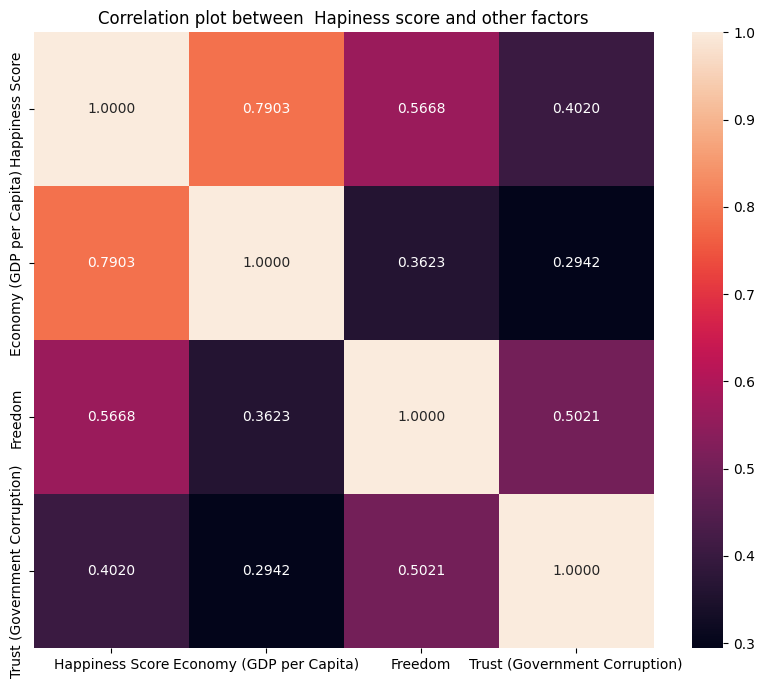

In [15]:
plt.figure(figsize=(10,8))
plt.title('Correlation plot between  Hapiness score and other factors')
#heatmap will take entire data frame
sns.heatmap(df_filtered.corr(),annot=True,fmt=".4f")
plt.show()

This is a good way to visualize whether one feature depends on another or not. Correlation goes from -1 to 1

• -1 is negatively correlated

• 0 means there is no particular correlation

• If it lies between ±0.5 and ± 1, then there is a strong correlation

• If values lies between ±0.30 and ±0.49 then there is a medium correlation

•  If the values lies below ±0.29 it is a small correlation


• If the color is dark it means is negatively correlated

• if it starts to become reddish it starts becoming positively correlated

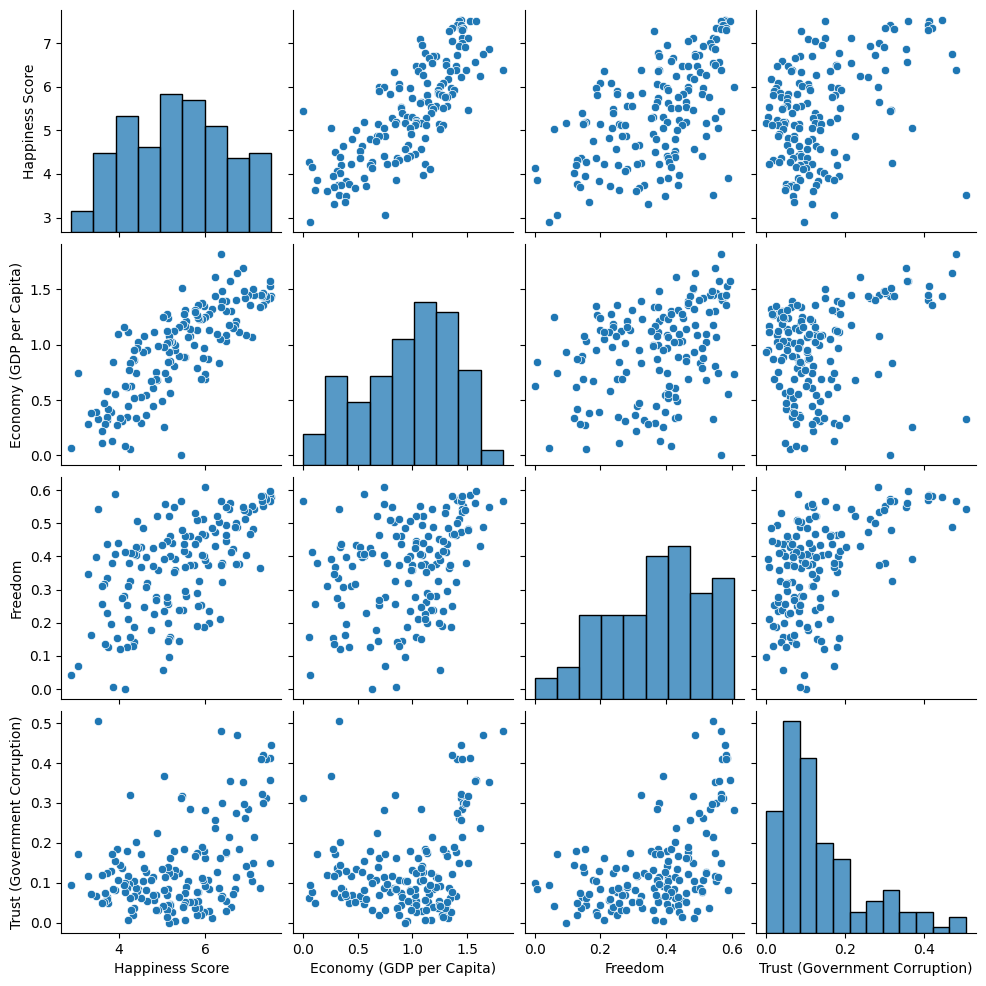

In [16]:
sns.pairplot(df_filtered)

Text(0.5, 1.0, ' Happiness Score vs. GDP per Capita')

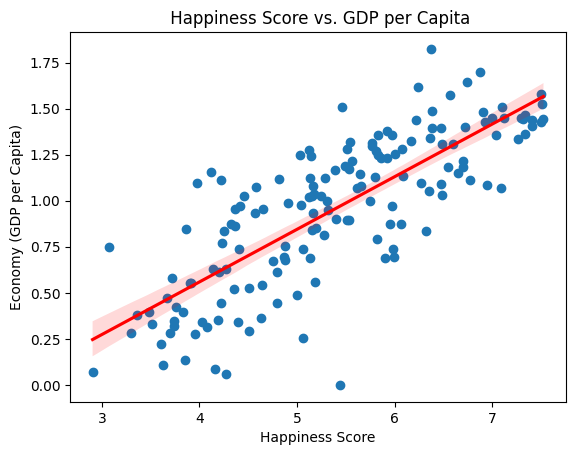

In [17]:
plt.scatter(df_filtered['Happiness Score'],df_filtered['Economy (GDP per Capita)'])
sns.regplot(x='Happiness Score', y='Economy (GDP per Capita)', data=df_filtered, scatter=False, color='red')
plt.xlabel('Happiness Score')
plt.ylabel('Economy (GDP per Capita)')
plt.title(' Happiness Score vs. GDP per Capita')

• The scatterplot of the Happiness Score vs GDP shows a strong positive correlation. This suggests that, on average, as GDP increases, the Happiness Score increases as well. As we know, correlation does not imply causation, but it gives us an idea of the association between economic prosperity and how happy a country is.

Text(0.5, 1.0, ' Happiness Score vs. Freedom')

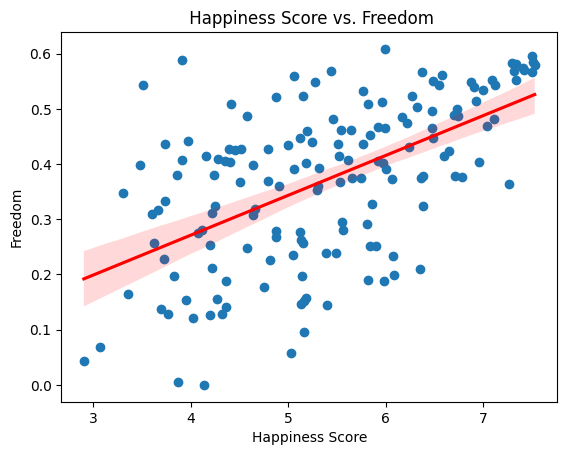

In [18]:
plt.scatter(df_filtered['Happiness Score'],df_filtered['Freedom'])
sns.regplot(x='Happiness Score', y='Freedom', data=df_filtered, scatter=False, color='red')
plt.xlabel('Happiness Score')
plt.ylabel('Freedom')
plt.title(' Happiness Score vs. Freedom')

• The scatterplot of Happiness Score vs Freedom shows a  positive correlation. This suggests that, on average, as Freedom increases, the Happiness Score increases as well. As we know, correlation does not imply causation, but it gives us an idea of the association between freedom and how happy a country is.

Text(0.5, 1.0, ' Happiness Score vs. Trust (Government Corruption)')

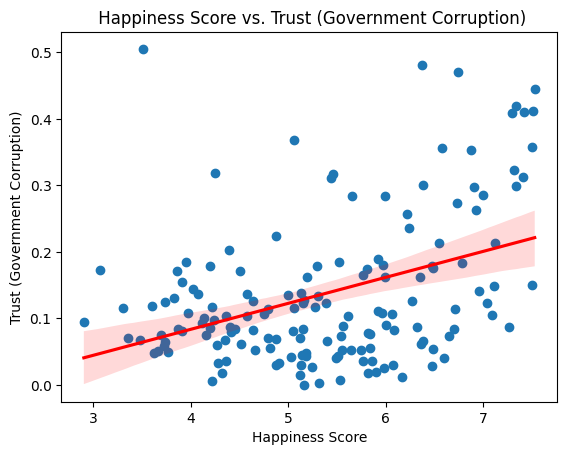

In [20]:
plt.scatter(df_filtered['Happiness Score'],df_filtered['Trust (Government Corruption)'])
sns.regplot(x='Happiness Score', y='Trust (Government Corruption)', data=df_filtered, scatter=False, color='red')
plt.xlabel('Happiness Score')
plt.ylabel('Trust (Government Corruption)')
plt.title(' Happiness Score vs. Trust (Government Corruption)')

• This scatterplot is not as easy to analyze as the ones before. In my opinion, the regression line does not suggest much, and I cannot appreciate a correlation between these two variables. This leads to the conclusion that the average level of trust people have in their government does not necessarily reflect how happy a country is.

# •  Histogram plots
I decided to plot all the histograms together differentiating them by colors. This helped me describe the distribution better.

<Axes: xlabel='Trust (Government Corruption)', ylabel='Count'>

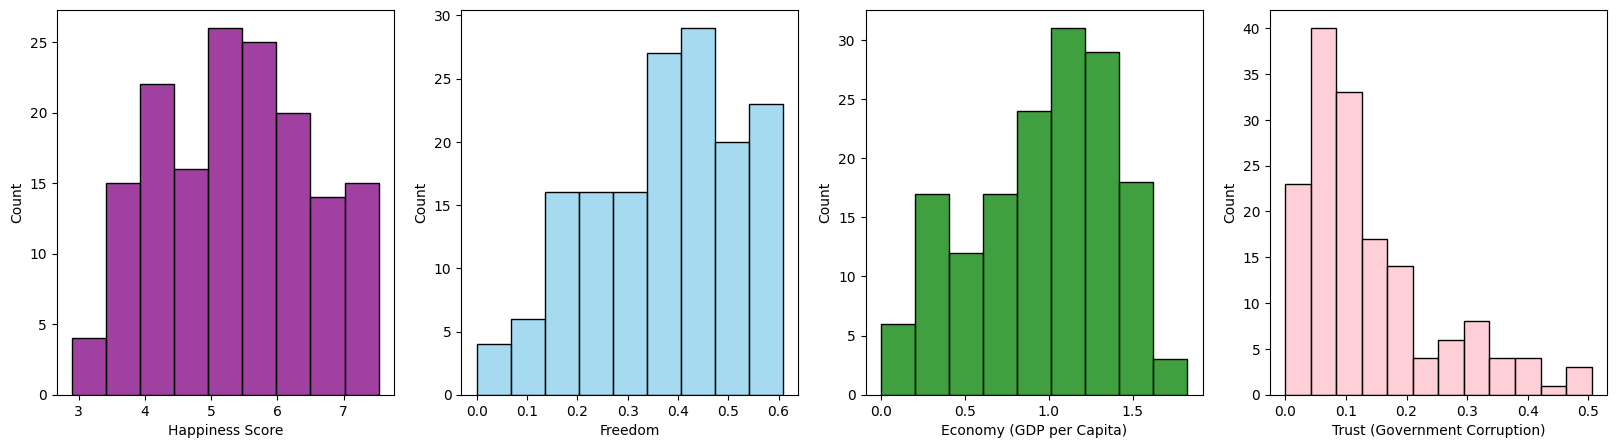

In [22]:
fig,axes=plt.subplots(1,4, figsize=(20,5))
sns.histplot(df_filtered, x='Happiness Score',color='purple' ,ax=axes[0])
sns.histplot(df_filtered, x='Freedom',color='skyblue', ax=axes[1])
sns.histplot(df_filtered, x='Economy (GDP per Capita)',color='green', ax=axes[2])
sns.histplot(df_filtered, x='Trust (Government Corruption)',color='pink', ax=axes[3])

*Happiness score*

•Just by looking at the histogram, it is showing a potential "normal" distribution. By looking at the information described, the mean is approximately 5.38, with a minimum score of 2.905 and a max of 7.526. The standard deviation is 1.14, indicating a moderate level of variability around the mean

*Freedom*

•The histogram shows that the distribution is skewed to the left (mean<median).The left skewness suggests that there are more countries with lower levels of freedom than those with higher levels.

*Economy*

•The histogram shows that the distribution is skewed to the left.  (mean<median). The left skewness suggests that there are more countries with lower GDP per capita than those with higher GDP per capita.

*Trust*

• The histogram shows the distribution is skewed to the right (mean>median). The right skewness suggests that there are more countries with lower levels of trust in government corruption than those with higher levels.



# Boxplots
• I wanted to create a boxplot to gain a better idea of the outliers. This will help me understand the noise in my data more effectively. As you can observe, you can actually appreciate the different boxplots in this graph. I will continue to create a boxplot for each column I am interested in

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Happiness Score'),
  Text(1, 0, 'Economy (GDP per Capita)'),
  Text(2, 0, 'Freedom'),
  Text(3, 0, 'Trust (Government Corruption)')])

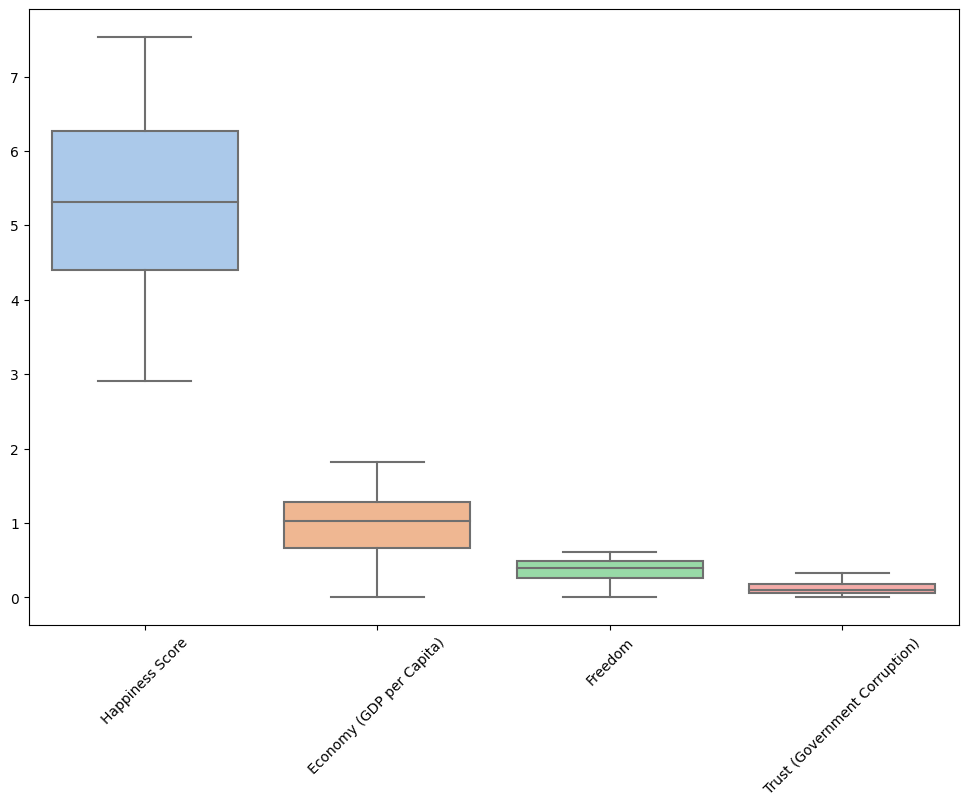

In [24]:
custom_palette = sns.color_palette("pastel")
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_filtered, palette=custom_palette, showfliers=False)
plt.xticks(rotation=45)


Text(0.5, 1.0, 'Boxplot of Happiness Score')

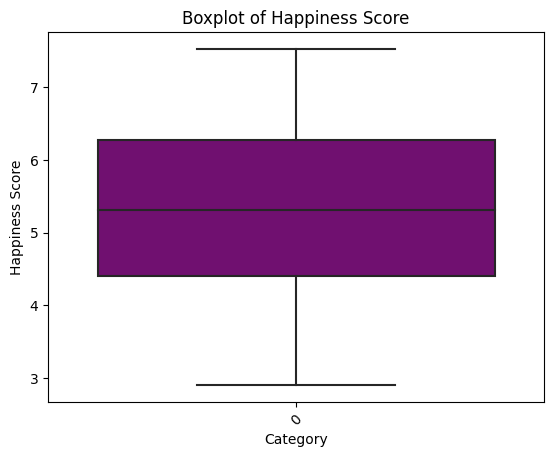

In [25]:

sns.boxplot( data=df_filtered['Happiness Score'],color='purple')
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Happiness Score')
plt.title('Boxplot of Happiness Score')

Text(0.5, 1.0, 'Boxplot of Freedome')

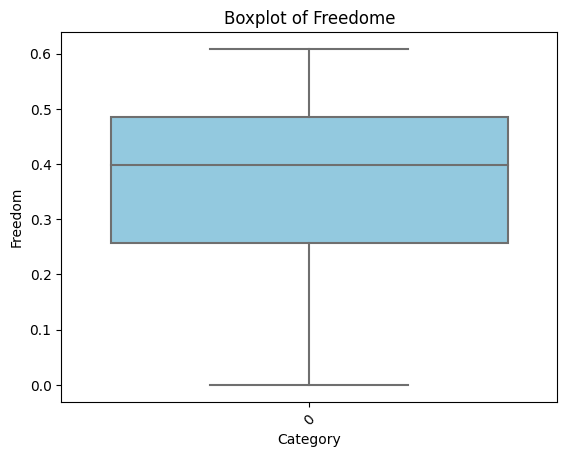

In [26]:

sns.boxplot( data=df_filtered['Freedom'],color='skyblue')
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Freedom')
plt.title('Boxplot of Freedome')

Text(0.5, 1.0, 'Boxplot of Economy (GDP per Capita)')

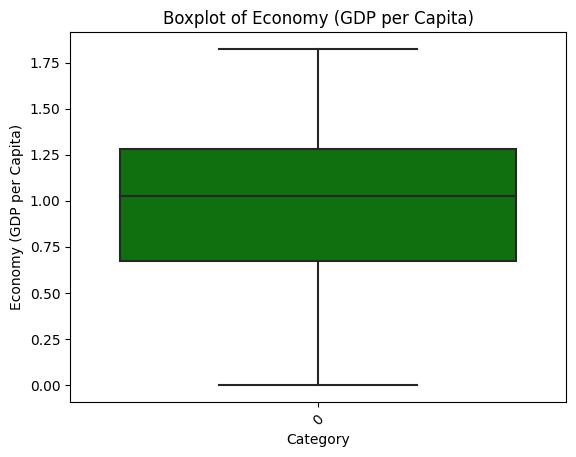

In [27]:
sns.boxplot( data=df_filtered['Economy (GDP per Capita)'],color='green')
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Economy (GDP per Capita)')
plt.title('Boxplot of Economy (GDP per Capita)')


Text(0.5, 1.0, 'Boxplot of Trust (Government Corruption)')

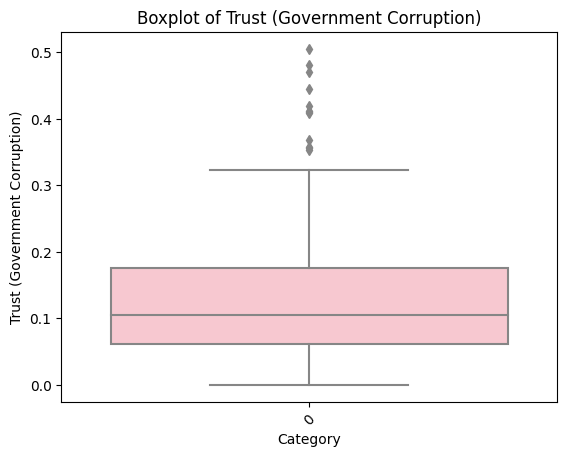

In [28]:

sns.boxplot( data=df_filtered['Trust (Government Corruption)'],color='pink')
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Trust (Government Corruption)')
plt.title('Boxplot of Trust (Government Corruption)')


•Observing the boxplots separately, I can conclude that the only category that is showing some outliers is Trust (government corruption). What I will do next is to calculate the IQR, because the first conclusion that comes to my mind is that there is noisy data in this column.

In [35]:
trust_column =df_filtered ['Trust (Government Corruption)']
Q1 = trust_column.quantile(0.25)
Q3 = trust_column.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
potential_outliers = trust_column[(trust_column < lower_bound) | (trust_column > upper_bound)]
potential_outliers

0      0.44453
1      0.41203
3      0.35776
4      0.41004
7      0.41904
9      0.40867
19     0.35329
21     0.46987
27     0.35561
35     0.48049
96     0.36794
151    0.50521
Name: Trust (Government Corruption), dtype: float64

Outliers are defined as values beyond 1.5 times the IQR. This set aims to draw attention to these points and highlight the presence of noise in the Trust column of the DataFrame.

## *Continental variations in happiness*


• Are there significant variations in happiness scores among different continents or regions?

For the next goal, I filtered the DataFrame only with the specific columns I intend to use.
The head() is just a way to confirm the data was filtered correctly

In [39]:
df_happiness_filtered=df[['Happiness Score','Region','Country']]
df_happiness_filtered.head()

,Happiness Score,Region,Country
0,7.526,Western Europe,Denmark
1,7.509,Western Europe,Switzerland
2,7.501,Western Europe,Iceland
3,7.498,Western Europe,Norway
4,7.413,Western Europe,Finland


This code df_happiness_filtered['Region'].unique() will show me the specific regions I will be working with

In [43]:
df_happiness_filtered['Region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [44]:
region_counts = df_happiness_filtered['Region'].value_counts()
region_counts

Sub-Saharan Africa                 38
Central and Eastern Europe         29
Latin America and Caribbean        24
Western Europe                     21
Middle East and Northern Africa    19
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

•For this goal, I want to observe if there is any difference in happiness between different regions. I filtered the data by region, happiness score, and country. The country might not be significant since I will just be working with the regional happiness score. To know exactly which regions I will be working with I used the next code: region_counts.

In [45]:
Sub = df_happiness_filtered[df_happiness_filtered['Region'] == 'Sub-Saharan Africa']
Central = df_happiness_filtered[df_happiness_filtered['Region'] == 'Central and Eastern Europe']
Latin = df_happiness_filtered[df_happiness_filtered['Region'] == 'Latin America and Caribbean']
West = df_happiness_filtered[df_happiness_filtered['Region'] == 'Western Europe']
Middle = df_happiness_filtered[df_happiness_filtered['Region'] == 'Middle East and Northern Africa']
SoutheastA = df_happiness_filtered[df_happiness_filtered['Region'] == 'Southeastern Asia']
SouthA = df_happiness_filtered[df_happiness_filtered['Region'] == 'Southern Asia']
EastA = df_happiness_filtered[df_happiness_filtered['Region'] == 'Eastern Asia']
NorthA = df_happiness_filtered[df_happiness_filtered['Region'] == 'North America']
Aus = df_happiness_filtered[df_happiness_filtered['Region'] == 'Australia and New Zealand']


• Once I have grouped the regions, I will proceed by comparing their average happiness scores. The mean will help me some sense of the happiness level of each region. Making it easier to compare them.



In [46]:
mean_Sub = Sub['Happiness Score'].mean()
mean_Cent = Central['Happiness Score'].mean()
mean_Latin = Latin['Happiness Score'].mean()
mean_West = West['Happiness Score'].mean()
mean_Middle = Middle['Happiness Score'].mean()
mean_SoutheastA = SoutheastA['Happiness Score'].mean()
mean_SouthA = SouthA['Happiness Score'].mean()
mean_EastA = EastA['Happiness Score'].mean()
mean_NorthA = NorthA['Happiness Score'].mean()
mean_Aus = Aus['Happiness Score'].mean()

I decided to create a dictionary that I will later use to create a new data frame using pandas. This will help me have a better organization to understand the mean values of each region better .

In [47]:
data_region = {'Region': ['Sub', 'Central', 'Latin', 'West', 'Middle', 'SoutheastA', 'SouthA', 'EastA', 'NorthA', 'Aus'],'Mean': [mean_Sub, mean_Cent, mean_Latin, mean_West, mean_Middle, mean_SoutheastA, mean_SouthA, mean_EastA, mean_NorthA, mean_Aus]}

In [48]:
new_df = pd.DataFrame(data_region)
new_df

,Region,Mean
0,Sub,4.136421
1,Central,5.370690
2,Latin,6.101750
3,West,6.685667
4,Middle,5.386053
5,SoutheastA,5.338889
6,SouthA,4.563286
7,EastA,5.624167
8,NorthA,7.254000
9,Aus,7.323500


After creating the new DataFrame, I decided to create a histogram. This is a very simple way to compare the mean happiness score across different regions.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Sub'),
  Text(1, 0, 'Central'),
  Text(2, 0, 'Latin'),
  Text(3, 0, 'West'),
  Text(4, 0, 'Middle'),
  Text(5, 0, 'SoutheastA'),
  Text(6, 0, 'SouthA'),
  Text(7, 0, 'EastA'),
  Text(8, 0, 'NorthA'),
  Text(9, 0, 'Aus')])

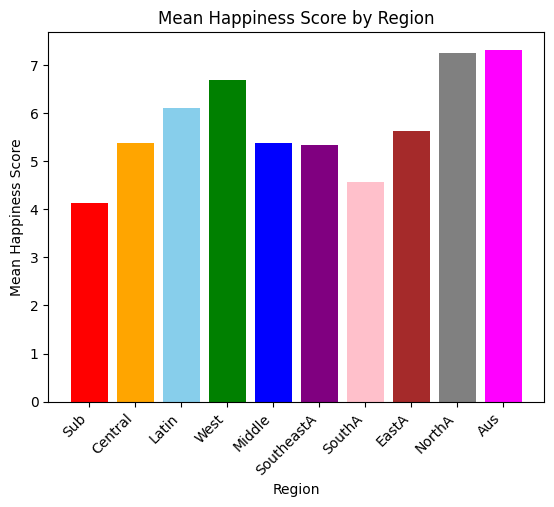

In [49]:
colors = ['red', 'orange', 'skyblue', 'green', 'blue', 'purple', 'pink', 'brown', 'gray', 'fuchsia']
plt.bar(new_df['Region'], new_df['Mean'], color=colors)
plt.xlabel('Region')
plt.ylabel('Mean Happiness Score')
plt.title('Mean Happiness Score by Region')
plt.xticks(rotation=45, ha='right')


• The obtained data reveals a diverse range of mean happiness scores across various regions. It is evident, that happiness scores vary significantly from one region to another. North America, Australia, and New Zealand stand out with high mean happiness scores. However, it's essential to note that these regions are based on data from just two countries each.

Additionally, the region with the lowest mean happiness score is Sub-Saharan Africa, which has the highest number of countries. I recognize the limitation of using the mean, as extreme observations can heavily influence it. To mitigate this, I intend to continue working with the median and interquartile range (IQR) to determine which countries appear to be the happiest.


In [50]:
new_df.describe

<bound method NDFrame.describe of        Region      Mean
0         Sub  4.136421
1     Central  5.370690
2       Latin  6.101750
3        West  6.685667
4      Middle  5.386053
5  SoutheastA  5.338889
6      SouthA  4.563286
7       EastA  5.624167
8      NorthA  7.254000
9         Aus  7.323500>

 I decided to group the data by Region. Then I created a DataFrame with the region information as an index and the happiness score as a column.  I applied the agg function to the happiness score for each region. In this aggregation function, I specified the list of values I was interested in mean, median, and standard deviation and lastly, I used the Lamba function. The lambda function helped me compute the IQR of each region.

In [ ]:
grouped_df = df_happiness_filtered.groupby('Region')['Happiness Score'].agg(['mean', 'median', np.std, lambda i: i.quantile(0.75) - i.quantile(0.25)]).reset_index()
grouped_df.columns = ['Region', 'Mean', 'Median', 'Standard Deviation', 'IQR']
grouped_df

,Region,Mean,Median,Standard Deviation,IQR
0,Australia and New Zealand,7.323500,7.3235,0.014849,0.01050
1,Central and Eastern Europe,5.370690,5.4880,0.590395,0.66800
2,Eastern Asia,5.624167,5.6465,0.526885,0.60125
3,Latin America and Caribbean,6.101750,6.1260,0.725680,0.86050
4,Middle East and Northern Africa,5.386053,5.3030,1.057559,1.51350
5,North America,7.254000,7.2540,0.212132,0.15000
6,Southeastern Asia,5.338889,5.2790,0.930686,1.12900
7,Southern Asia,4.563286,4.6430,0.616190,0.55300
8,Sub-Saharan Africa,4.136421,4.1300,0.558494,0.68825
9,Western Europe,6.685667,6.9070,0.789190,0.97800


I then decided to create a boxplot with these results.

---



Text(0, 0.5, 'Happiness Score')

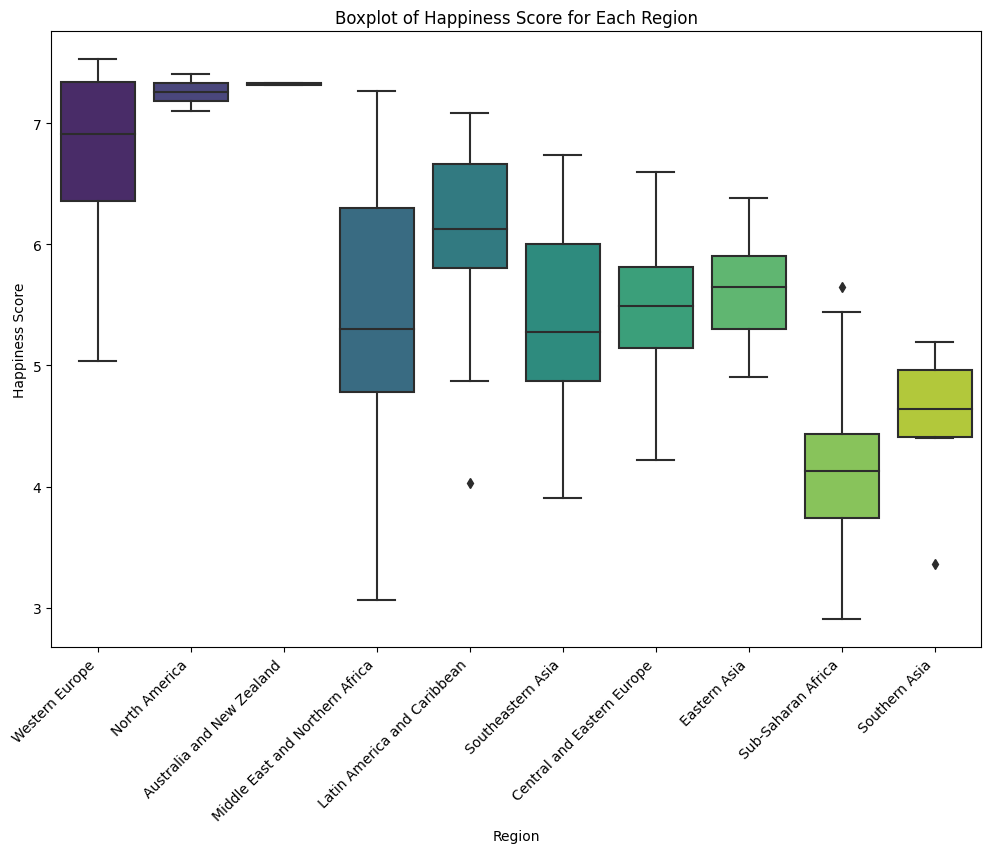

In [51]:

plt.figure(figsize=(12, 8))
sns.boxplot(x='Region', y='Happiness Score', data=df_happiness_filtered, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Boxplot of Happiness Score for Each Region')
plt.xlabel('Region')
plt.ylabel('Happiness Score')

• So after all those calculations and graphs, I decided to create a table where I can observe the data that later on will be used for the boxplot. With a quick visualization working with the boxplot, I can conclude that the regions of Western Europe, Australia New Zealand, and North America by looking at their happiness score appear to be "happier" than the rest of the regions. Of course, it would be very premature to establish that they are the happiest regions in the world, but based on this statistical analysis that's what it appears to be.

# •*Comparing the family  and happiness score*


•Is there any relationship between region, happiness score, and the influence on family?

• Extra, does the saddest country based on happiness score compared to the happy country (based on happiness score) have a bigger value on family?

For the next goal, I filtered the DataFrame only with the specific columns I intend to use.
The head() is just a way to confirm the data was filtered correctly

In [52]:
df_filt = df[['Region',	'Country',	 'Happiness Score', 'Family']]


In [53]:
df_filt.head()

,Region,Country,Happiness Score,Family
0,Western Europe,Denmark,7.526,1.16374
1,Western Europe,Switzerland,7.509,1.14524
2,Western Europe,Iceland,7.501,1.18326
3,Western Europe,Norway,7.498,1.12690
4,Western Europe,Finland,7.413,1.13464



My last goal is to analyze and understand the relationship between region, happiness score, and family values. I decided to plot a scatterplot and show the regression line

Text(0.5, 1.0, ' Happiness Score vs. Family')

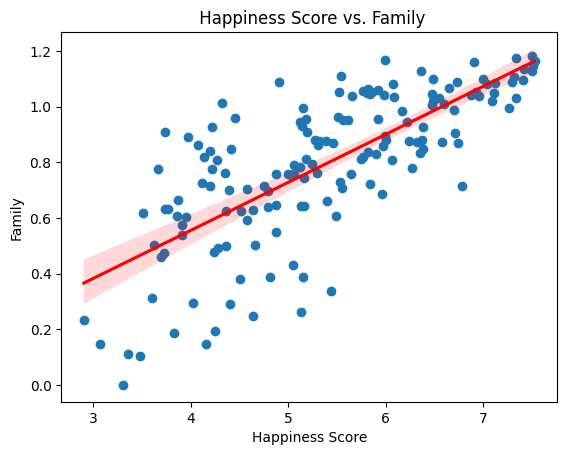

In [54]:
plt.scatter(df_filt['Happiness Score'], df_filt['Family'])
sns.regplot(x='Happiness Score', y='Family', data=df_filt, scatter=False, color='red')
plt.xlabel('Happiness Score')
plt.ylabel('Family')
plt.title(' Happiness Score vs. Family')

To analyze the correlation better I created a  heatmap

<ipython-input-56-79b2275ba195>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_filt.corr(),annot=True,fmt=".4f")


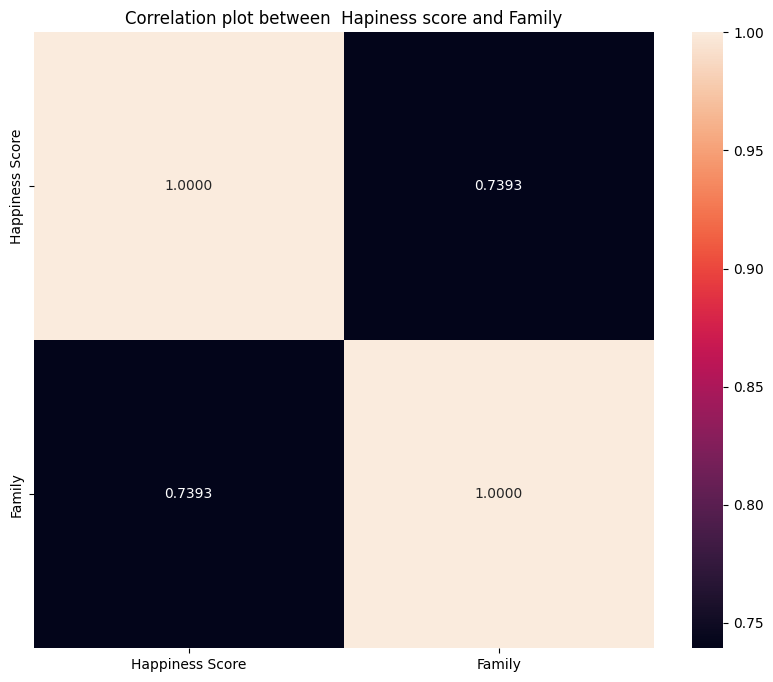

In [56]:
plt.figure(figsize=(10,8))
plt.title('Correlation plot between  Hapiness score and Family')
#heatmap will take entire data frame
sns.heatmap(df_filt.corr(),annot=True,fmt=".4f")
plt.show()

This is a good way to visualize whether one feature depends on another or not. Correlation goes from -1 to 1

• -1 is negatively correlated

• 0 means there is no particular correlation

• If it lies between ±0.5 and ± 1, then there is a strong correlation

• If values lies between ±0.30 and ±0.49 then there is a medium correlation

•  If the values lies below ±0.29 it is a small correlation


• If the color is dark it means is negatively correlated

• if it starts to become reddish it starts becoming positively correlated

Based on the previous information Happiness score and the family value appear to have a strong correlation; since the value is 0.79. We could conclude that family does have a positive influence on the happiness score of each region/country.


Now just because I curious, I decided to compare the least happy country in the world which i named saddest to the max happy country in the world (happiest country)

In [ ]:
saddest_country=df_filt.loc[df_filt['Happiness Score'].idxmin()]
saddest_country

Region             Sub-Saharan Africa
Country                       Burundi
Happiness Score                 2.905
Family                        0.23442
Name: 156, dtype: object

In [ ]:
happiest_country=df_filt.loc[df_filt['Happiness Score'].idxmax()]
happiest_country

Region             Western Europe
Country                   Denmark
Happiness Score             7.526
Family                    1.16374
Name: 0, dtype: object

Then I asked myself what If i compared the top 10 happiest regions/countries in the world with the top 10 saddest ones

In [58]:
top_10_happiest = df_filt.sort_values(by=['Happiness Score','Family'], ascending=False).head(10)
top_10_saddest = df_filt.sort_values(by=['Happiness Score','Family']).head(10)

And because i wanted to plot this information I proceed to combine the data from these two variables into one.

In [60]:
combined = pd.concat([top_10_happiest, top_10_saddest])
combined

,Region,Country,Happiness Score,Family
0,Western Europe,Denmark,7.526,1.16374
1,Western Europe,Switzerland,7.509,1.14524
2,Western Europe,Iceland,7.501,1.18326
3,Western Europe,Norway,7.498,1.12690
4,Western Europe,Finland,7.413,1.13464
5,North America,Canada,7.404,1.09610
6,Western Europe,Netherlands,7.339,1.02912
7,Australia and New Zealand,New Zealand,7.334,1.17278
8,Australia and New Zealand,Australia,7.313,1.10476
9,Western Europe,Sweden,7.291,1.08764


To finish my analysis, I decided to create an arrangement that would allow me for a side-by-side visual comparison of Happiness scores and Family values for both regions an countries. I believe this will help me identify easily the patterns and differences and even come to a conclusion.

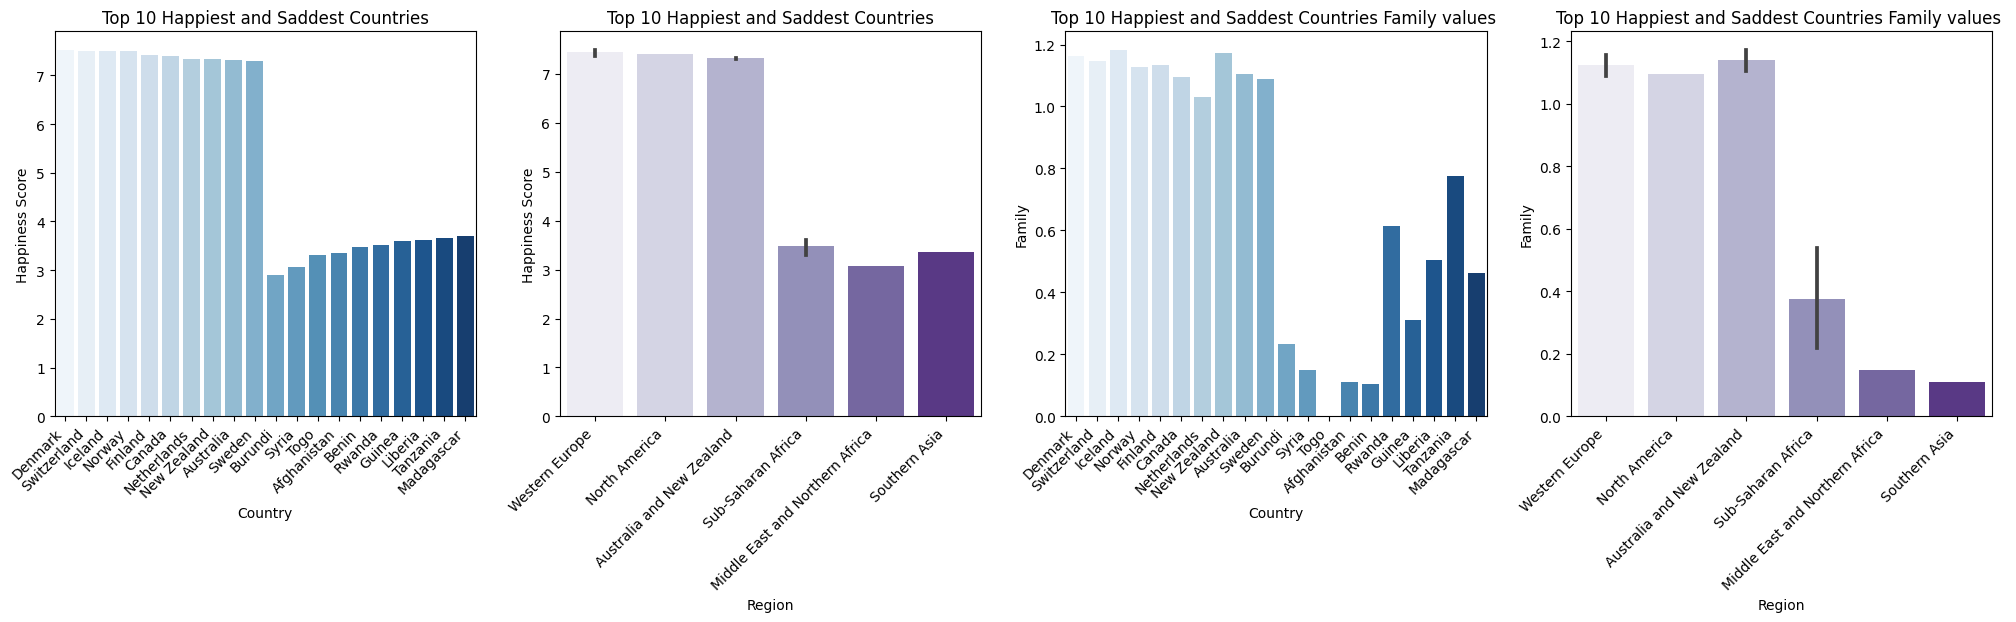

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(25, 5))
sns.barplot(x='Country', y='Happiness Score', data=combined, palette='Blues', ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
axes[0].set_title('Top 10 Happiest and Saddest Countries')
sns.barplot(x='Region', y='Happiness Score', data=combined, palette='Purples', ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
axes[1].set_title('Top 10 Happiest and Saddest Countries')
sns.barplot(x='Country', y='Family', data=combined, palette='Blues', ax=axes[2])
axes[2].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
axes[2].set_title('Top 10 Happiest and Saddest Countries Family values ')
sns.barplot(x='Region', y='Family', data=combined, palette='Purples', ax=axes[3])
axes[3].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
axes[3].set_title('Top 10 Happiest and Saddest Countries Family values ')
plt.show()

Combining the graphs with the data obtained on the heatmap. I can conclude that indeed the correlation between happiness score and family is strong. It shows that the family value provokes a positive response in the happiness score. Nonetheless, correlation does not imply causation, it would be very difficult to determine if these top 10 countries are indeed happier because the family values.

### Ethics


While this set helped me work on my skills in Python and it challenged me, I do have some concerns. Firstly, it only provides data for 157 countries out of a total of 195. The exclusion of 38 countries raises questions about representativeness and potential bias. On a personal note, I am not a big fan of how they divided the regions; it seems somewhat arbitrary and potentially biased. Additionally, the lack of clarity on the interpretation of values poses a challenge. If someone examines my results, they may face the same confusion I experienced. Understanding the values is crucial since inaccuracies in interpretation could lead to incorrect conclusions.

Lastly, there is a notable ethical concern regarding how the happiness score is determined based on specific factors. The rationale behind choosing these factors is not explicitly explained, raising questions about transparency and potential biases in the scoring system. It's essential to address these concerns for a more comprehensive and reliable analysis.
